In [62]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
data_all = pd.read_csv("LAI_drone_vs_Licor_use.csv")
data_selected = pd.read_csv("LAI_drone_vs_Licor_selected.csv")
data_row = pd.read_csv("Row_LAI_drone_vs_Licor.csv")
print(data_all.shape)
print(data_selected.shape)
print(data_row.shape)

(70, 4)
(60, 3)
(20, 3)


In [64]:
import sklearn
from sklearn import linear_model
regr = linear_model.LinearRegression()

<IPython.core.display.Javascript object>


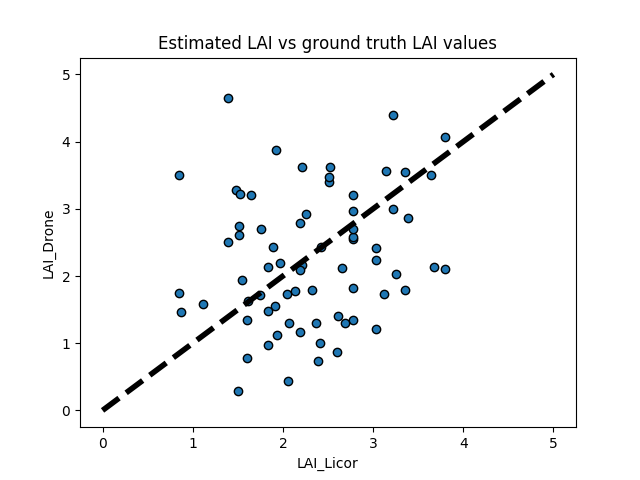

array([[1.        , 0.19128561],
       [0.19128561, 1.        ]])

In [20]:
fig, ax = plt.subplots()
ax.scatter(data_all.LAI_drone, data_all.LAI_Licor, edgecolors=(0, 0, 0))
ax.plot([0,5], [0,5], 'k--', lw=4)
ax.set_xlabel('LAI_Licor')
ax.set_ylabel('LAI_Drone')
plt.title('Estimated LAI vs ground truth LAI values')
plt.show()

np.corrcoef(data_all.LAI_Licor,data_all.LAI_drone)

<IPython.core.display.Javascript object>


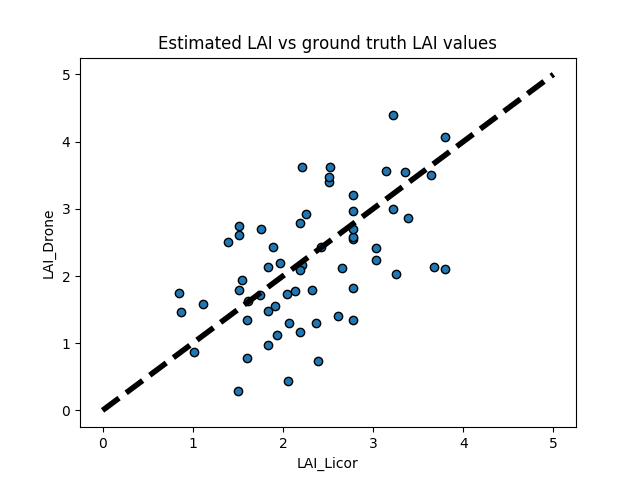

array([[1.       , 0.5321291],
       [0.5321291, 1.       ]])

In [21]:
fig, ax = plt.subplots()
ax.scatter(data_selected.LAI_drone, data_selected.LAI_Licor, edgecolors=(0, 0, 0))
ax.plot([0,5], [0,5], 'k--', lw=4)
ax.set_xlabel('LAI_Licor')
ax.set_ylabel('LAI_Drone')
plt.title('Estimated LAI vs ground truth LAI values')
plt.show()

np.corrcoef(data_selected.LAI_Licor,data_selected.LAI_drone)

<IPython.core.display.Javascript object>


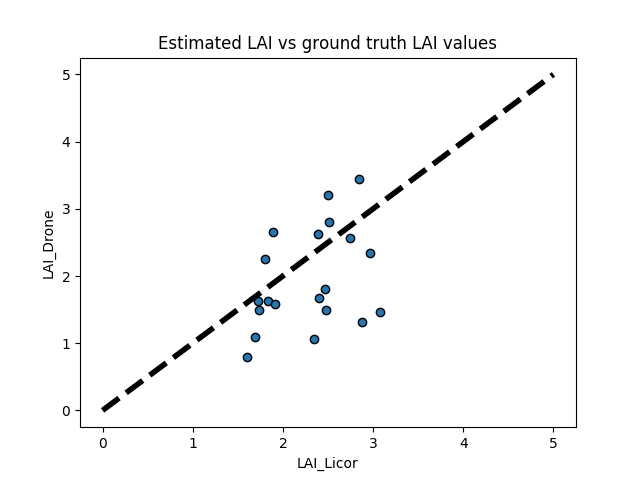

array([[1.        , 0.37638459],
       [0.37638459, 1.        ]])

In [22]:
fig, ax = plt.subplots()
ax.scatter(data_row.LAI_drone, data_row.LAI_Licor, edgecolors=(0, 0, 0))
ax.plot([0,5], [0,5], 'k--', lw=4)
ax.set_xlabel('LAI_Licor')
ax.set_ylabel('LAI_Drone')
plt.title('Estimated LAI vs ground truth LAI values')
plt.show()

np.corrcoef(data_row.LAI_Licor,data_row.LAI_drone)

# All data

<IPython.core.display.Javascript object>


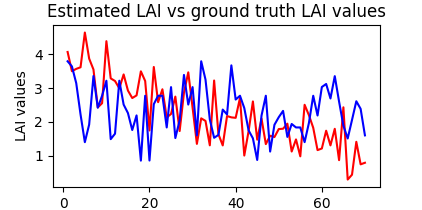

In [23]:
plt.figure()
plt.plot(data_all.Location, data_all.LAI_Licor, color='r')
plt.plot(data_all.Location, data_all.LAI_drone, color='b')
plt.xlabel("Data Points")
plt.ylabel("LAI values")
plt.title('Estimated LAI vs ground truth LAI values')
plt.show()

<IPython.core.display.Javascript object>


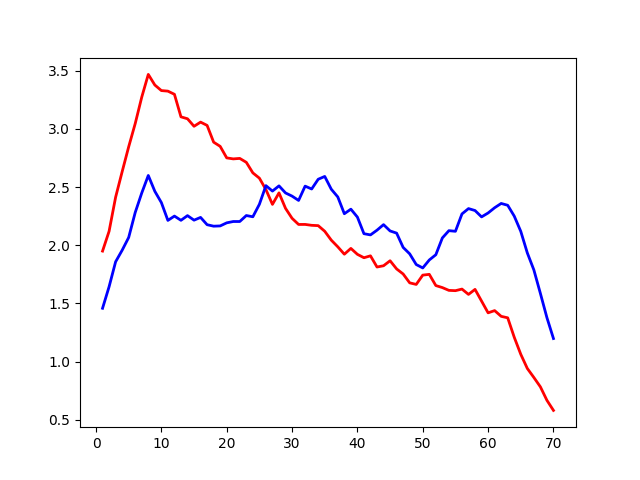

In [31]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth
Licor_all_data = smooth(data_all.LAI_Licor,15)
Drone_all_data = smooth(data_all.LAI_drone,15)
plt.figure()
# plt.plot(data.Location, data.LAI_Licor,'o')
plt.plot(data_all.Location, Licor_all_data, 'r-', lw=2)
plt.plot(data_all.Location, Drone_all_data, 'b-', lw=2)
# plt.plot(data.Location, smooth(data.LAI_Licor,10), 'g-', lw=2)


<IPython.core.display.Javascript object>


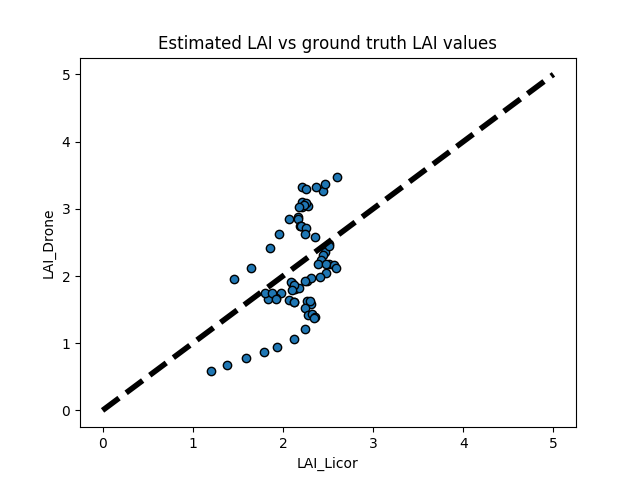

array([[1.        , 0.48600974],
       [0.48600974, 1.        ]])

In [32]:
fig, ax = plt.subplots()
ax.scatter(Drone_all_data, Licor_all_data, edgecolors=(0, 0, 0))
ax.plot([0,5], [0,5], 'k--', lw=4)
ax.set_xlabel('LAI_Licor')
ax.set_ylabel('LAI_Drone')
plt.title('Estimated LAI vs ground truth LAI values')
plt.show()

np.corrcoef(Licor_all_data,Drone_all_data)

# Selected Data

<IPython.core.display.Javascript object>


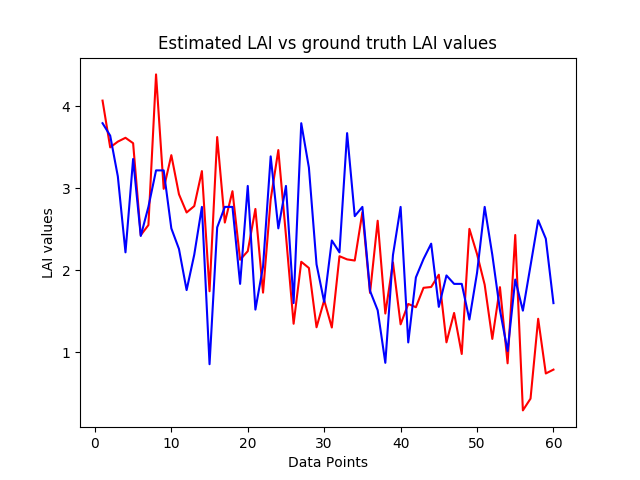

In [90]:
plt.figure()
plt.plot(data_selected.Location, data_selected.LAI_Licor, color='r')
plt.plot(data_selected.Location, data_selected.LAI_drone, color='b')
plt.xlabel("Data Points")
plt.ylabel("LAI values")
plt.title('Estimated LAI vs ground truth LAI values')
plt.show()

<IPython.core.display.Javascript object>


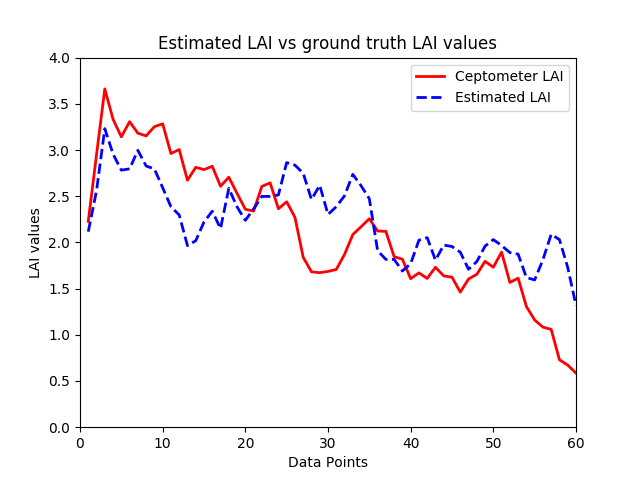

In [91]:
# def smooth(y, box_pts):
#     box = np.ones(box_pts)/box_pts
#     y_smooth = np.convolve(y, box, mode='same')
#     return y_smooth
Licor_selected_data = smooth(data_selected.LAI_Licor,5)
Drone_selected_data = smooth(data_selected.LAI_drone,5)
plt.figure()
# plt.plot(data.Location, data.LAI_Licor,'o')
plt.plot(data_selected.Location, Licor_selected_data, 'r-', lw=2, label='Ceptometer LAI')
plt.plot(data_selected.Location, Drone_selected_data, 'b--', lw=2, label='Estimated LAI')
plt.ylim(0,4)
plt.xlim(0,60)
plt.legend()
plt.xlabel("Data Points")
plt.ylabel("LAI values")
plt.title('Estimated LAI vs ground truth LAI values')
plt.savefig("LAi_trend.png")

<IPython.core.display.Javascript object>


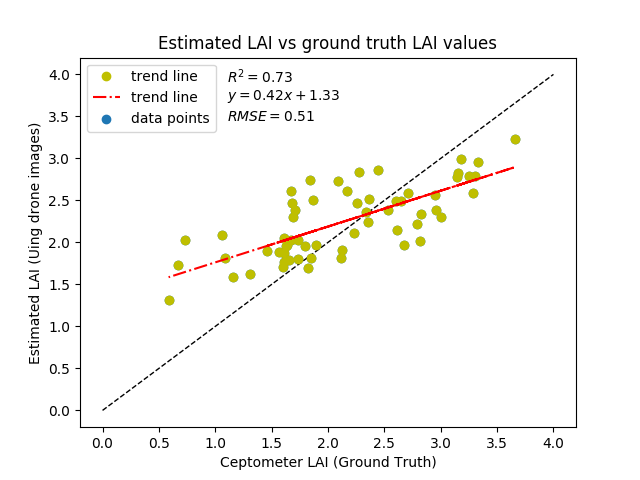

[[1.         0.73404257]
 [0.73404257 1.        ]]
0.4264028752141466
1.335891318012008


In [118]:
fig, ax = plt.subplots()
ax.scatter(Licor_selected_data,Drone_selected_data, label='data points')
ax.plot([0,4], [0,4], 'k--', lw=1)

m, c = np.polyfit(Licor_selected_data, Drone_selected_data,1)
plt.plot(Licor_selected_data, Drone_selected_data, 'yo', Licor_selected_data, m*Licor_selected_data+c, '-.r', label='trend line') 
ax.set_xlabel('Ceptometer LAI (Ground Truth)')
ax.set_ylabel('Estimated LAI (Uing drone images)')
plt.title('Estimated LAI vs ground truth LAI values')
plt.legend()
plt.show()
plt.text(1.1, 3.9,'$R^2 = 0.73$')
plt.text(1.1, 3.7,'$y = 0.42x+1.33$')
plt.text(1.1, 3.45,'$RMSE = 0.51$')
plt.savefig("LAI_Regression")
print(np.corrcoef(Licor_selected_data, Drone_selected_data))
print(m)
print(c)

In [89]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(Licor_selected_data, Drone_selected_data))
rms

0.5124938074422624

# Row data

<IPython.core.display.Javascript object>


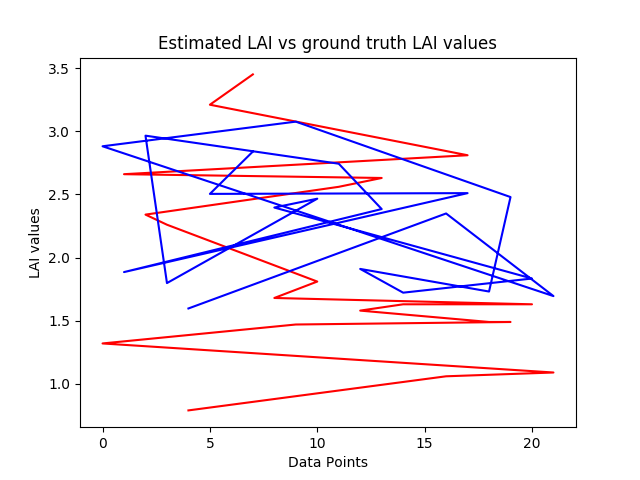

In [47]:
plt.figure()
plt.plot(data_row.Location, data_row.LAI_Licor, color='r')
plt.plot(data_row.Location, data_row.LAI_drone, color='b')
plt.xlabel("Data Points")
plt.ylabel("LAI values")
plt.title('Estimated LAI vs ground truth LAI values')
plt.show()

<IPython.core.display.Javascript object>


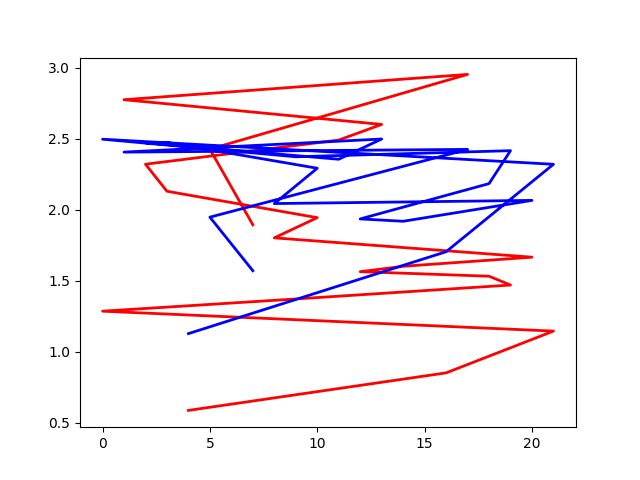

In [54]:
Licor_row_data = smooth(data_row.LAI_Licor,5)
Drone_row_data = smooth(data_row.LAI_drone,5)
plt.figure()
# plt.plot(data.Location, data.LAI_Licor,'o')
plt.plot(data_row.Location, Licor_row_data, 'r-', lw=2)
plt.plot(data_row.Location, Drone_row_data, 'b-', lw=2)

<IPython.core.display.Javascript object>


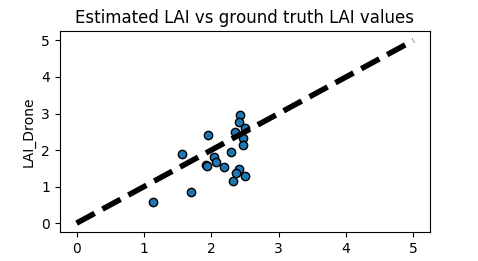

array([[1.       , 0.5386926],
       [0.5386926, 1.       ]])

In [55]:
fig, ax = plt.subplots()
ax.scatter(Drone_row_data, Licor_row_data, edgecolors=(0, 0, 0))
ax.plot([0,5], [0,5], 'k--', lw=4)
ax.set_xlabel('LAI_Licor')
ax.set_ylabel('LAI_Drone')
plt.title('Estimated LAI vs ground truth LAI values')
plt.show()

np.corrcoef(Licor_row_data, Drone_row_data)